# Customer Segmentation with Unsupervised Learning

## Table of Context

### 
- Business Problem

- Source of dataset

- Importing Dataset, Required Library and Functions

- Exploratory Data Analysis
    1. Overview
    2. Analysis of Categorical Variables
    3. Analysis of Numerical Variables
    4. Analysis of Correlation
    
    
- DATA PREPROCESSING
    1. Missing Values (Eksik Değerler) and Feature Extraction (Özellik Çıkarımı) 
    2. Outliers (Aykırı Değerler)
    3. LOG TRANSFORMATION
    4. Feature Scaling (Özellik Ölçeklendirme) 

- Modelling(KMeans)  
- Modelling(Hierarchical Clustering)    
- REPORTING

## Business Problem:

Machine learning with rule-based customer segmentation method RFM Comparison of K-Means method for customer segmentation is expected.

## Source of dataset 

https://www.kaggle.com/datasets/jillwang87/online-retail-ii

The data set named Online Retail II is the online sales of a UK-based retail company between 01/12/2009 and 09/12/2011.
contains transactions. The company's product catalog includes souvenirs and the information that most of its customers are wholesalers.
available.

### 
**InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invoice date and time. Numeric. The day and time when a transaction was generated.

**UnitPrice**: Unit price. Numeric. Product price per unit in sterling.

**CustomerID**: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal. The name of the country where a customer resides.

## Importing Dataset, Required Library and Functions

In [188]:
import pandas as pd
from scipy import stats
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import numpy as np
import warnings

pd.set_option ('display.max_columns', 50)
pd.set_option ('display.max_rows', 50)
pd.set_option ('display.float_format', lambda x: '%.2f' % x)
pd.set_option ('display.width', 1000)
warnings.filterwarnings ("ignore")

df_ = pd.read_excel (r"\online_retail_II-230817-120704.xlsx", sheet_name="Year 2009-2010")



# Exploratory Data Analysis

1. Overview
2. Analysis of Categorical Variables
3. Analysis of Numerical Variables
4. Analysis of Correlation

# 1. Overview
Lets start with taking a copy and information about data set.

In [189]:
df = df_.copy ()

In [190]:
def check_df(dataframe, head=5):
    print(f"##################### Shape #####################\n")
    print(dataframe.shape)

    print(f"\n##################### Types #####################\n")
    print(dataframe.dtypes)

    print(f"\n##################### Head #####################\n")
    print(dataframe.head(head))

    print(f"\n##################### Tail #####################\n")
    print(dataframe.tail(head))

    print(f"\n##################### NA #####################\n")
    print(dataframe.isnull().sum())

    print(f"\n##################### Quantiles #####################\n")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [191]:
check_df(df)

##################### Shape #####################

(525461, 8)

##################### Types #####################

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

##################### Head #####################

  Invoice StockCode                          Description  Quantity         InvoiceDate  Price  Customer ID         Country
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12 2009-12-01 07:45:00   6.95     13085.00  United Kingdom
1  489434    79323P                   PINK CHERRY LIGHTS        12 2009-12-01 07:45:00   6.75     13085.00  United Kingdom
2  489434    79323W                  WHITE CHERRY LIGHTS        12 2009-12-01 07:45:00   6.75     13085.00  United Kingdom
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48 2009-12-01 07:45:00  

In [192]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
     Note: Categorical variables with numerical appearance are also included in categorical variables.

    Parameters
    ------
        dataframe: dataframe
                The dataframe from which variable names are to be retrieved
        cat_th: int, optional
                Class threshold for numeric but categorical variables
        car_th: int, optinal
                Class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical Variables List
        num_cols: list
                Numeric Variables List
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = Total Number of Variables
        cat_cols includes num_but_cat
        The sum of 3 lists with return is equal to the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [193]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 525461
Variables: 8
cat_cols: 0
num_cols: 4
cat_but_car: 4
num_but_cat: 0


# 2. Analysis of Categorical Variables

In [194]:
def cat_summary(dataframe, col_name, plot=False):

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print(f"######################\n")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

In [195]:
for col_name in cat_but_car:
    cat_summary(df,col_name)

         Invoice  Ratio
537434       675   0.13
538071       652   0.12
537638       601   0.11
537237       597   0.11
536876       593   0.11
...          ...    ...
523981         1   0.00
523984         1   0.00
523985         1   0.00
C523988        1   0.00
C516462        1   0.00

[28816 rows x 2 columns]
######################

        StockCode  Ratio
85123A       3516   0.67
22423        2221   0.42
85099B       2057   0.39
21212        1933   0.37
21232        1843   0.35
...           ...    ...
90005B          1   0.00
90197C          1   0.00
90080           1   0.00
20904           1   0.00
21120           1   0.00

[4632 rows x 2 columns]
######################

                                     Description  Ratio
WHITE HANGING HEART T-LIGHT HOLDER          3549   0.68
REGENCY CAKESTAND 3 TIER                    2212   0.42
STRAWBERRY CERAMIC TRINKET BOX              1843   0.35
PACK OF 72 RETRO SPOT CAKE CASES            1466   0.28
ASSORTED COLOUR BIRD ORNAMENT    

# 3. Analysis of Numerical Variables

In [196]:
def num_summary(dataframe, numerical_col, plot=False,bins=10):

    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    print(dataframe[numerical_col].describe(quantiles).T)
    print(f"\n##### Plot #####\n")

    if plot:
        dataframe[numerical_col].hist(bins=bins)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

count   525461.00
mean        10.34
std        107.42
min      -9600.00
5%           1.00
10%          1.00
20%          1.00
30%          1.00
40%          2.00
50%          3.00
60%          5.00
70%          8.00
80%         12.00
90%         24.00
95%         30.00
99%        120.00
max      19152.00
Name: Quantity, dtype: float64

##### Plot #####



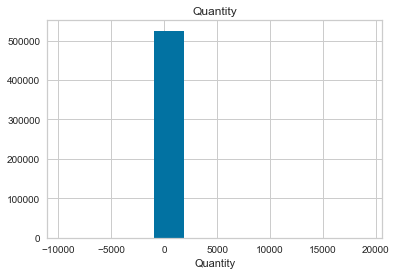

count                  525461
unique                  25296
top       2010-12-06 16:57:00
freq                      675
first     2009-12-01 07:45:00
last      2010-12-09 20:01:00
Name: InvoiceDate, dtype: object

##### Plot #####



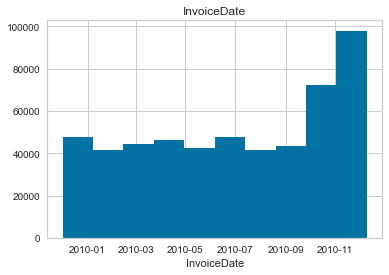

count   525461.00
mean         4.69
std        146.13
min     -53594.36
5%           0.42
10%          0.65
20%          1.25
30%          1.28
40%          1.66
50%          2.10
60%          2.95
70%          3.75
80%          4.95
90%          7.95
95%         10.17
99%         19.95
max      25111.09
Name: Price, dtype: float64

##### Plot #####



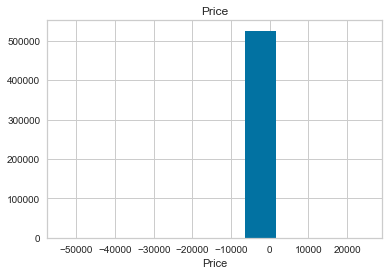

count   417534.00
mean     15360.65
std       1680.81
min      12346.00
5%       12725.00
10%      13042.00
20%      13624.00
30%      14256.00
40%      14735.00
50%      15311.00
60%      15959.00
70%      16549.00
80%      17133.00
90%      17706.00
95%      17913.00
99%      18196.00
max      18287.00
Name: Customer ID, dtype: float64

##### Plot #####



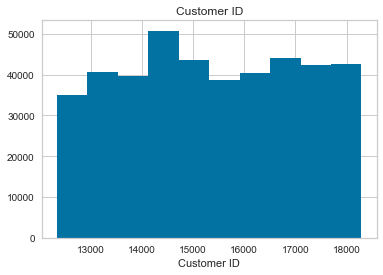

In [197]:
for col in num_cols:
    num_summary(df, col, plot=True)

# 4. Analysis of Correlation

In [198]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
       
        cmap = sns.diverging_palette(220, 20, as_cmap=True)
        sns.heatmap(corr, cmap=cmap, center=0, annot=True, fmt=".2f")
        plt.show()
    return drop_list

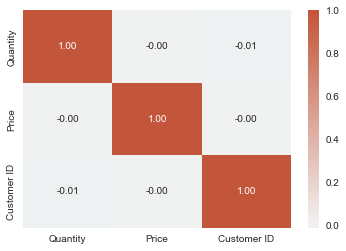

[]

In [199]:
high_correlated_cols(df, plot=True)

# DATA PREPROCESSING

1. Missing Values (Eksik Değerler) and Feature Extraction (Özellik Çıkarımı) 
2. Outliers (Aykırı Değerler)
3. LOG TRANSFORMATION
4. Feature Scaling (Özellik Ölçeklendirme)


# 1. Missing Values and Feature Extraction

In [200]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country'], dtype='object')

In [201]:
df = df[~df["Invoice"].str.contains ("C", na=False)]
df = df[(df['Quantity'] > 0)]
df.dropna (inplace=True)
df.describe ([0.01, 0.1, 0.25, 0.5, 0.75, 0.90, 0.99])
df[df["Price"] == 0]["StockCode"].unique ()
df = df[df["StockCode"] != "M"]
invalid_codes = df[df["StockCode"].astype (str).str.contains (r"[a-zA-Z]{3,}")]["StockCode"].unique ().tolist ()
invalid_codes


['POST', 'BANK CHARGES', 'TEST001', 'TEST002', 'PADS', 'ADJUST', 'ADJUST2']

In [202]:
df[df["StockCode"].isin (invalid_codes)].groupby (["StockCode"]).agg ({"Invoice": "nunique",
                                                                       "Quantity": "sum",
                                                                       "Price": "sum",
                                                                       "Customer ID": "nunique"})

,Invoice,Quantity,Price,Customer ID
StockCode,,,,
ADJUST,32,32,3538.52,25
ADJUST2,3,3,731.05,3
BANK CHARGES,20,20,300.00,12
PADS,14,14,0.01,12
POST,738,2212,19964.83,230
TEST001,11,60,40.50,4
TEST002,1,1,1.00,1


In [203]:
df = df[~df["StockCode"].isin (invalid_codes)].reset_index (drop=True)
check_df(df)

##################### Shape #####################

(406450, 8)

##################### Types #####################

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

##################### Head #####################

  Invoice StockCode                          Description  Quantity         InvoiceDate  Price  Customer ID         Country
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12 2009-12-01 07:45:00   6.95     13085.00  United Kingdom
1  489434    79323P                   PINK CHERRY LIGHTS        12 2009-12-01 07:45:00   6.75     13085.00  United Kingdom
2  489434    79323W                  WHITE CHERRY LIGHTS        12 2009-12-01 07:45:00   6.75     13085.00  United Kingdom
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48 2009-12-01 07:45:00  

In [204]:
df["TotalPrice"] = df["Quantity"] * df["Price"]
df.describe ([0.01, 0.1, 0.25, 0.5, 0.75, 0.90, 0.99])
max_invoice_date = df["InvoiceDate"].max ()
today_date = (max_invoice_date + dt.timedelta (days=2))

In [205]:
rfm = df.groupby ("Customer ID").agg ({"InvoiceDate": lambda date: (today_date - date.max ()).days,
                                       "Invoice": "nunique",
                                       "TotalPrice": "sum"})

In [206]:
rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.00,166,2,169.36
12347.00,4,2,1323.32
12348.00,75,1,221.16
12349.00,44,2,2221.14
12351.00,12,1,300.93


In [207]:
rfm.columns = ["Recency", "Frequency", "Monetary"]

# 2. Outliers

In [208]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [209]:
rfm = rfm[(rfm["Monetary"]) > 0 & (rfm["Frequency"] > 0)]
rfm.describe ([0.01, 0.1, 0.25, 0.5, 0.75, 0.90, 0.99])
for col in rfm.columns:
    print (col, check_outlier (rfm, col))
for col in rfm.columns:
    replace_with_thresholds (rfm, col)
rfm.describe ()

Recency True
Frequency True
Monetary True


,Recency,Frequency,Monetary
count,4286.00,4286.00,4286.00
mean,90.01,3.59,1196.06
std,92.30,3.07,1176.34
min,2.00,1.00,1.55
25%,19.00,1.00,307.66
50%,53.00,2.00,702.25
75%,136.75,5.00,1703.98
max,313.38,11.00,3798.48


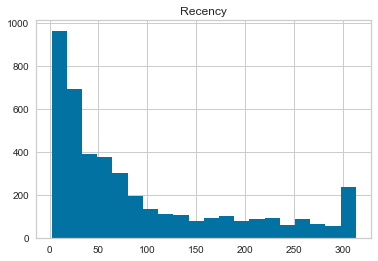

In [210]:
rfm["Recency"].hist (bins=20)
plt.title ("Recency")
plt.show ()

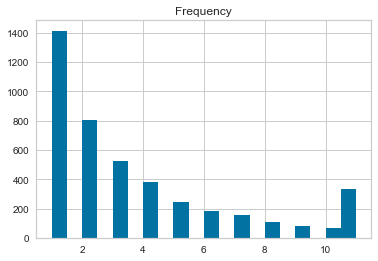

In [211]:
rfm["Frequency"].hist (bins=20)
plt.title ("Frequency")
plt.show ()

# 3. LOG TRANSFORMATION

In [212]:
for col in ["Recency", "Frequency"]:
    rfm[f"LOG_{col}"] = np.log1p (rfm[col])
rfm.head ()

,Recency,Frequency,Monetary,LOG_Recency,LOG_Frequency
Customer ID,,,,,
12346.00,166.00,2,169.36,5.12,1.10
12347.00,4.00,2,1323.32,1.61,1.10
12348.00,75.00,1,221.16,4.33,0.69
12349.00,44.00,2,2221.14,3.81,1.10
12351.00,12.00,1,300.93,2.56,0.69


# 4. Feature Scaling

In [213]:
sc = StandardScaler ()
sc.fit (rfm[["LOG_Recency", "LOG_Frequency"]])
scaled_rf = sc.transform (rfm[["LOG_Recency", "LOG_Frequency"]])

scaled_df = pd.DataFrame (index=rfm.index, columns=["LOG_Recency", "LOG_Frequency"], data=scaled_rf)
scaled_df

,LOG_Recency,LOG_Frequency
Customer ID,,
12346.00,1.00,-0.39
12347.00,-1.86,-0.39
12348.00,0.36,-1.07
12349.00,-0.07,-0.39
12351.00,-1.08,-1.07
...,...,...
18283.00,-0.73,1.02
18284.00,0.28,-1.07
18285.00,1.47,-1.07


# Modelling(KMeans)

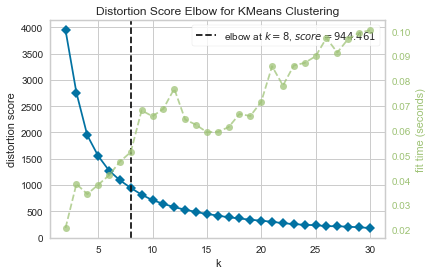

In [214]:
# Determining Optimal Numbers of Cluster
kmeans = KMeans ()
elbow = KElbowVisualizer (kmeans, k=30)
elbow.fit (scaled_df)
elbow.show ();

In [215]:
k_ = elbow.elbow_value_

print (k_)

8


In [216]:
k_means = KMeans (n_clusters=k_, random_state=99).fit (scaled_df)
segments = k_means.labels_

rfm["KMeans_Segments"] = segments
rfm.head ()


,Recency,Frequency,Monetary,LOG_Recency,LOG_Frequency,KMeans_Segments
Customer ID,,,,,,
12346.00,166.00,2,169.36,5.12,1.10,7
12347.00,4.00,2,1323.32,1.61,1.10,6
12348.00,75.00,1,221.16,4.33,0.69,2
12349.00,44.00,2,2221.14,3.81,1.10,2
12351.00,12.00,1,300.93,2.56,0.69,6


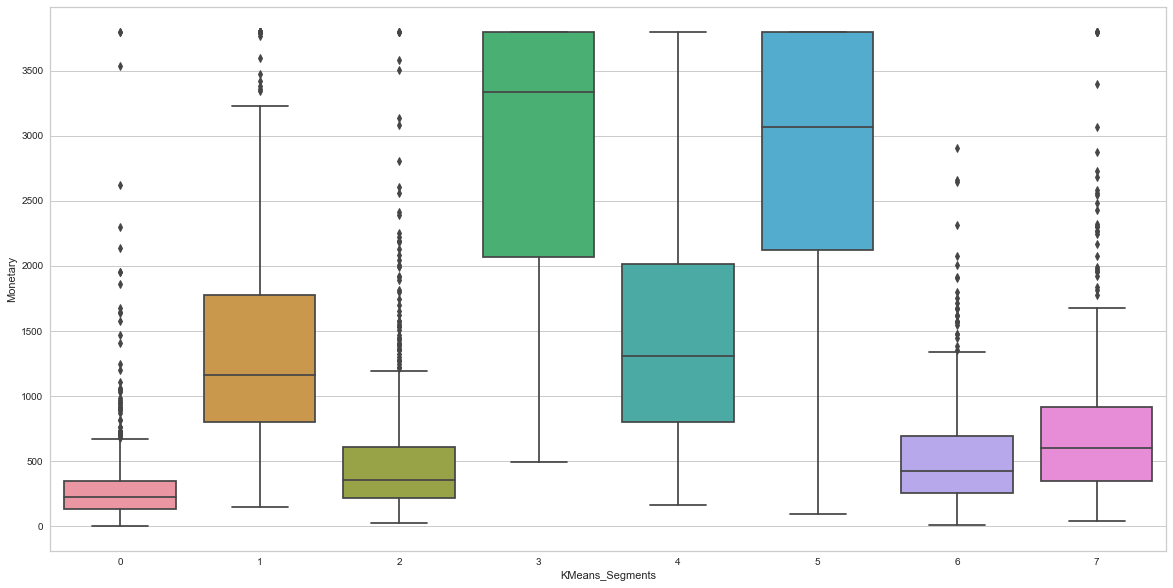

In [217]:
rfm.groupby ("KMeans_Segments").agg ({"Recency": ["mean", "median", "count"],
                                      "Frequency": ["mean", "median", "count"],
                                      "Monetary": ["mean", "median", "count"]})


plt.figure (figsize=(20, 10))
sns.boxplot (x="KMeans_Segments", y="Monetary", data=rfm)
plt.show ();

# Modelling(Hierarchical Clustering)

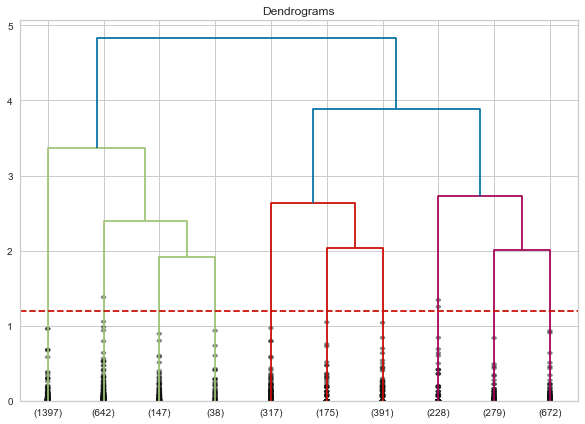

In [218]:
hc_complete = linkage(scaled_df, 'complete')

plt.figure (figsize=(10, 7))
plt.title ("Dendrograms")
dend = dendrogram (hc_complete,
                   truncate_mode="lastp",
                   p=10,
                   show_contracted=True,
                   leaf_font_size=10)
plt.axhline (y=1.2, color='r', linestyle='--')
plt.show ()

In [219]:
hc = AgglomerativeClustering (n_clusters=6)
segments = hc.fit_predict (scaled_df)
rfm["Hierarchi_Segments"] = segments
rfm.groupby ("Hierarchi_Segments").agg ({"Recency": ["mean", "median", "count"],
                                         "Frequency": ["mean", "median", "count"],
                                         "Monetary": ["mean", "median", "count"]})

Recency              Frequency              Monetary              
                      mean median count      mean median count     mean  median count
Hierarchi_Segments                                                                   
0                   114.95  86.00  1168      2.72   2.00  1168   962.48  721.25  1168
1                     5.22   4.00   468      8.13  10.00   468  2594.66 2767.07   468
2                    41.12  34.00   828      1.20   1.00   828   423.84  310.75   828
3                   234.17 239.00   753      1.00   1.00   753   305.86  226.30   753
4                    57.97  50.00   459      8.22   8.00   459  2695.60 2841.07   459
5                    19.86  18.00   610      4.75   5.00   610  1589.05 1298.22   610

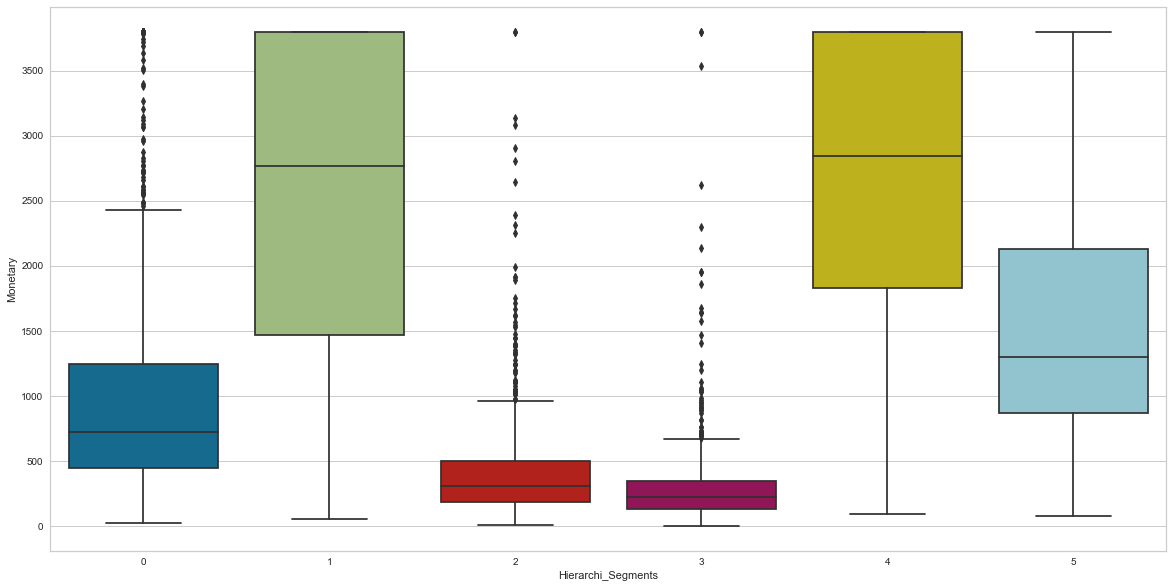

In [220]:
plt.figure (figsize=(20, 10))
sns.boxplot (x="Hierarchi_Segments", y="Monetary", data=rfm)
plt.show ();

# REPORTING

The project's objective is to perform Customer Segmentation using K-Means and Hierarchical Clustering by leveraging RFM Metrics, while also exploring alternative metrics to enhance the depth of clustering insights.

## Stages conducted within the scope of the project:

### 1. Importing and Loading Phase:
- Required Libraries and Functions imported and dataset read

### 2. via Exploratory Data Analysis:
- The structural information of the data set was examined.
- Descriptive statistics of the data set were examined.
- The size information of the data set has been reached.
- The types of categorical and numerical variables in the data set were examined and visualized.
- Categorical and numerical variables were analyzed.
- Correlation between variables observed and visualized.

### 3. In data preprocessing process:

- As a result of the outlier analysis, 3 variables(Recency,Frequency,Monetary) with outliers were observed  among the numerical variables and were suppressed by the threshold values determined by the IQR values.
- During the Feature Extraction phase, 3 new variables were produced.
- Before the modeling phase, the variables were scaled with the StandartScaler method.

### 4. In Model Building Phase:

This stage encompasses the process of constructing your model using data mining techniques to perform customer segmentation. To determine customer segments, we applied two different methods: K-Means Clustering and Hierarchical Clustering.

**K-Means Clustering**: Firstly, we scaled the data and utilized the "Elbow Method" to determine the optimal number of clusters. The K-Means algorithm was then executed with the determined optimal cluster count. Each customer was assigned to these clusters, resulting in the creation of the "KMeans_Segments" column, indicating the segment to which each customer belongs. Subsequently, the means and medians of Recency, Frequency, and Monetary values were calculated for each segment.

Additionally, box plots of "Monetary" values were drawn to visualize these segments.

**Hierarchical Clustering**: As the second method, a hierarchical clustering tree was constructed using the data. This tree was visualized using a dendrogram, and a specific similarity threshold at 1.2 was applied to cut the tree. This cut was used to partition customers into subgroups, and each customer was assigned a "Hierarchi_Segments" column, indicating their segment based on the results of hierarchical clustering.

Finally, means and medians of Recency, Frequency, and Monetary values were calculated for each hierarchical segment. Box plots of "Monetary" values were also drawn to visualize these segments.

These two distinct clustering methods assist in understanding customer behaviors and values, forming a crucial foundation for determining marketing strategies and objectives.

